# Naive Bayes Machine Learning Model

When we were young we have all come across a chapter in our Maths textbooks called 'Probability'. We have come across questions like "What would be the probability of getting a 'Queen' after 'King', if we draw 2 random consecutive cards from a deck of 52 cards?" These types of question came under a topic called 'Conditional Probability'. Conditional Probability forms the base of **Naive Bayes Model**. To put the above example into formula:

$P(Queen And King) = P(Queen) * P(King | Queen)$ <br>
where, <br>
$P(Queen And King)$ is the Probability of getting Queen and King on two consecutive draws <br>
$P(Queen)$ is the Probability of getting a Queen <br>
$P(King | Queen)$ is the Probability of getting a King, given we have already drawn a card that was a Queen

To build this model I will be using National Basketball Association (NBA) dataset. I will try to predict whether a player will have a career that will last more than five years based on the data I have. There are different types of Naive Bayes Models. Here I will use a Gaussian Naive Bayes Model to make my predictions.

In [1]:
import numpy as np
import pandas as pd

In [2]:
extracted_data = pd.read_csv('extracted_nba_players_data.csv')

In [3]:
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


### Seperating our Target and Predictor variables

Let us first seperate our target and predictor variables.

In [4]:
y = extracted_data['target_5yrs']

X = extracted_data.copy()
X = X.drop('target_5yrs', axis=1)

In [5]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64

In [6]:
X.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304


### Splitting the data

We always need to train our model before it starts predicting. Some part of the data is used to train our model and some part of our data is used to evaluate our model. We will split our data into 75:25 ratio. 75% of the data will be used to train and 25% of the data will be used to test our model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Just to verify, let us check the shape of all our train and test variables.

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Training the model

To train our model, we will first create a Gaussian Naive Bayes Classifier. <br>
We will then fit our training data into our this classifier to train our model.

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluating our model using metrics scores

To evaluate our model, we will first predict the target variable using our test predictor variables. Then we will evaluate these predictions alongside our test target variables using accuracy, precision, recall and F1 scores.

In [10]:
y_preds = nb.predict(X_test)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print("Accuracy :", "%.3f" % accuracy_score(y_test, y_preds))
print("Precision :", "%.3f" % precision_score(y_test, y_preds))
print("Recall :", "%.3f" % recall_score(y_test, y_preds))
print("F1 Score :", "%.3f" % f1_score(y_test, y_preds))

Accuracy : 0.654
Precision : 0.838
Recall : 0.548
F1 Score : 0.663


**Precision:** Precision tells you how many Positives were actually True out of all the Positive predictions our model made.
$$precision = \frac{\text{true positives}}{\text{false positives + true positives}}$$

**Recall:** Recall tells you how many Positives were actually identified by our model out of all the actual Positives present in our dataset.
$$recall = \frac{\text{true positives}}{\text{false negatives + true positives}}$$

**Accuracy:** Accuracy tells us out of all the predictions that were made, how many were true.
$$accuracy = \frac{\text{true positives + true negatives}}{\text{true positives + true negatives + false positives + false negatives}}$$

**F1 Score:** F1 combines both recall and precision. It penalizes extreme negative values of either component.
$$F1 = \frac{\text{2 * precision * recall}}{\text{precision + recall}}$$

Let us evaluate using the Confusion Matrix

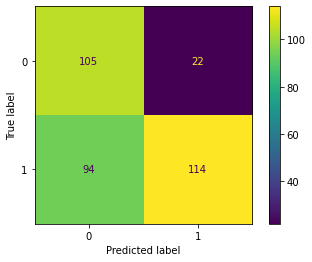

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)
disp.plot(values_format="d")
plt.show()

There were:<br>
105 True Negatives<br>
114 True Positives<br>
94 False Negatives<br>
22 False Positives